In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

'''
This is a large dataset and low_memory=False was required since Pandas uses
significant resources to read each column and identify the data type. A better
solution would be to specify the data type for each column in advance, but
that can have unintended errors with improperly formatted data.

There is a ReadMe.txt file in the /data/ directory with information about
acquiring the Building_Permits.csv file. Since that CSV file is over 100MB,
it could not be included on GitHub.
'''
df = pd.read_csv (r'./data/Building_Permits.csv', low_memory=False)
df.head()

,X,Y,OBJECTID,permittypemapped,workclass,permitclass,proposedworkdescription,permitclassmapped,applieddate,issueddate,...,voiddate,workclassmapped,GlobalID,CreationDate,Creator,EditDate,Editor,const_type,occupancyclass,permitnum
0,NaN,NaN,47520,Building,New Building,324.0,NaN,Residential,2000/04/19 18:30:49+00,2000/04/26 15:16:34+00,...,NaN,New,45bb79c5-cc94-4ab7-9883-deab6c05f486,2018/03/16 01:55:55.663+00,justin.greco@raleighnc.gov_ral,2019/07/19 12:56:25.206+00,NaN,VI U,BUSINESS,000884
1,NaN,NaN,47521,Building,New Building,324.0,NaN,Residential,2000/04/10 15:05:56+00,2000/04/26 15:16:18+00,...,NaN,New,675f6d3e-358a-4b6d-b001-b21d4353035f,2018/03/16 01:55:55.663+00,justin.greco@raleighnc.gov_ral,2019/07/19 12:56:25.206+00,NaN,V U,ASSEMBLY SMALL,000571
2,NaN,NaN,47522,Building,Alterations/repairs,318.0,GRILL,Non-Residential,2000/05/22 17:35:10+00,2000/07/03 13:59:20+00,...,NaN,Existing,0b192fb0-3879-4bbc-b4f9-e91b7c7419de,2018/03/16 01:55:55.663+00,justin.greco@raleighnc.gov_ral,2019/07/19 12:56:25.206+00,NaN,VI U,BUSINESS,001769
3,NaN,NaN,47523,Building,Addition,437.0,ADD TO RALEIGH COUNTRY CLUB,Non-Residential,2000/07/13 14:10:59+00,2000/08/14 14:46:02+00,...,NaN,Existing,c5d7649a-1e56-4ec5-8c9d-73cf5ff3bc46,2018/03/16 01:55:55.663+00,justin.greco@raleighnc.gov_ral,2019/07/19 12:56:25.206+00,NaN,V U,ASSEMBLY SMALL,002989
4,NaN,NaN,47524,Building,Alterations/repairs,437.0,ALTER TO RALEIGH COUNTRY CLUB,Non-Residential,2000/08/03 14:53:08+00,2000/08/14 14:46:19+00,...,NaN,Existing,e74418a5-7ee1-468b-9d33-314b1c049ed6,2018/03/16 01:55:55.663+00,justin.greco@raleighnc.gov_ral,2019/07/19 12:56:25.206+00,NaN,V U,ASSEMBLY SMALL,003611


In [33]:
'''
All data fields that have a date in this dataset begin with a four digit year.
This function will take a DATA FRAME, COLUMN NAME, and YEAR to return a data
frame with only the rows that match the year in the given column.
'''
def get_by_year (data_frame, column_name, year):
    return data_frame.loc[data_frame[column_name].astype(str).str[:4]==str(year)]

In [34]:
'''
For this analysis, we will look at data for 2016 - 2021 to identify
the impact the pandemic had on building permits in Raleigh.
'''
applied2016 = get_by_year(df, 'applieddate', 2016)
applied2017 = get_by_year(df, 'applieddate', 2017)
applied2018 = get_by_year(df, 'applieddate', 2018)
applied2019 = get_by_year(df, 'applieddate', 2019)
applied2020 = get_by_year(df, 'applieddate', 2020)
applied2021 = get_by_year(df, 'applieddate', 2021)

issued2016 = get_by_year(df, 'issueddate', 2016)
issued2017 = get_by_year(df, 'issueddate', 2017)
issued2018 = get_by_year(df, 'issueddate', 2018)
issued2019 = get_by_year(df, 'issueddate', 2019)
issued2020 = get_by_year(df, 'issueddate', 2020)
issued2021 = get_by_year(df, 'issueddate', 2021)

codate2016 = get_by_year(df, 'coissueddate', 2016)
codate2017 = get_by_year(df, 'coissueddate', 2017)
codate2018 = get_by_year(df, 'coissueddate', 2018)
codate2019 = get_by_year(df, 'coissueddate', 2019)
codate2020 = get_by_year(df, 'coissueddate', 2020)
codate2021 = get_by_year(df, 'coissueddate', 2021)

years = ['2016', '2017', '2018', '2019', '2020', '2021']
x_pos = [i for i, _ in enumerate(years)]

applied = [len(applied2016.index), len(applied2017.index), len(applied2018.index),
           len(applied2019.index), len(applied2020.index), len(applied2021.index)]

issued = [len(issued2016.index), len(issued2017.index), len(issued2018.index),
          len(issued2019.index), len(issued2020.index), len(issued2021.index)]

codate = [len(codate2016.index), len(codate2017.index), len(codate2018.index),
          len(codate2019.index), len(codate2020.index), len(codate2021.index)]

residential = [applied2016['permitclassmapped'].value_counts()[0],
               applied2017['permitclassmapped'].value_counts()[0],
               applied2018['permitclassmapped'].value_counts()[0],
               applied2019['permitclassmapped'].value_counts()[0],
               applied2020['permitclassmapped'].value_counts()[0],
               applied2021['permitclassmapped'].value_counts()[0]]

nonResidential = [applied2016['permitclassmapped'].value_counts()[1],
               applied2017['permitclassmapped'].value_counts()[1],
               applied2018['permitclassmapped'].value_counts()[1],
               applied2019['permitclassmapped'].value_counts()[1],
               applied2020['permitclassmapped'].value_counts()[1],
               applied2021['permitclassmapped'].value_counts()[1]]

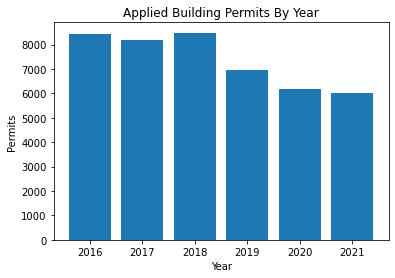

In [35]:
# Plot 2016 - 2021 applied building permits.
plt.bar(x_pos, applied)
plt.xlabel("Year")
plt.ylabel("Permits")
plt.title("Applied Building Permits By Year")

plt.xticks(x_pos, years)

plt.show()

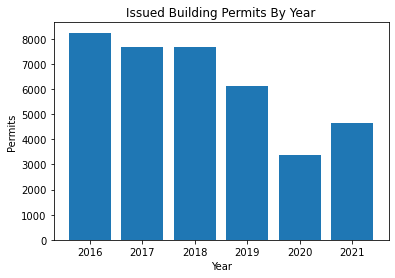

In [36]:
# Plot 2016 - 2021 issued building permits.
plt.bar(x_pos, issued)
plt.xlabel("Year")
plt.ylabel("Permits")
plt.title("Issued Building Permits By Year")

plt.xticks(x_pos, years)

plt.show()

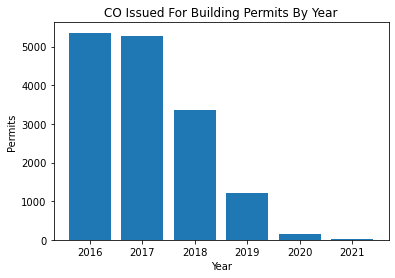

In [37]:
# Plot 2016 - 2021 certificate of occupancy issued.
plt.bar(x_pos, codate)
plt.xlabel("Year")
plt.ylabel("Permits")
plt.title("CO Issued For Building Permits By Year")

plt.xticks(x_pos, years)

plt.show()

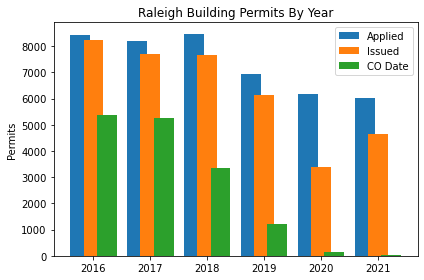

In [38]:
x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/1.5, applied, width, label='Applied')
rects2 = ax.bar(x, issued, width, label='Issued')
rects2 = ax.bar(x + width/1.5, codate, width, label='CO Date')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Permits')
ax.set_title('Raleigh Building Permits By Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

fig.tight_layout()

plt.show()

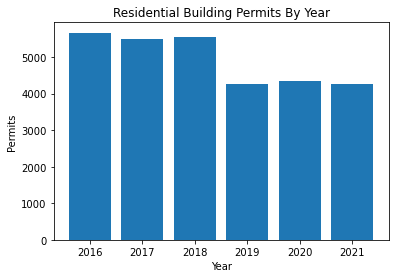

In [39]:
# Plot 2016 - 2021 residential permits.
plt.bar(x_pos, residential)
plt.xlabel("Year")
plt.ylabel("Permits")
plt.title("Residential Building Permits By Year")

plt.xticks(x_pos, years)

plt.show()

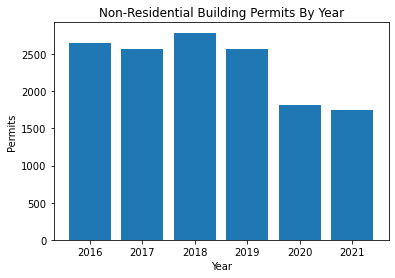

In [40]:
# Plot 2016 - 2021 non-residential permits.
plt.bar(x_pos, nonResidential)
plt.xlabel("Year")
plt.ylabel("Permits")
plt.title("Non-Residential Building Permits By Year")

plt.xticks(x_pos, years)

plt.show()

<AxesSubplot:>

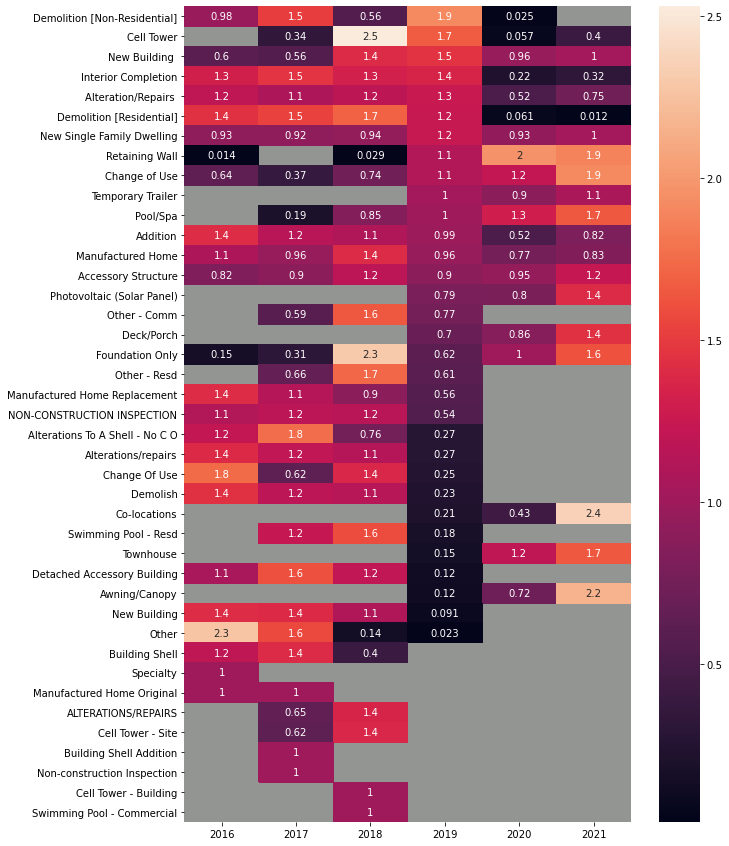

In [79]:
'''
Pandemic related changes in work classifications using 2019 as the diciding line
between pre and post-pandemic construction projects.
'''

# Create a dataframe with the value countes for each of the work classifications by
# year with a column containing the mean for each classification.

classifications = pd.concat([issued2016['workclass'].value_counts(),
                 issued2017['workclass'].value_counts(),
                 issued2018['workclass'].value_counts(),
                 issued2019['workclass'].value_counts(),
                 issued2020['workclass'].value_counts(),
                 issued2021['workclass'].value_counts()], axis=1)
classifications.columns = years
classifications['mean'] = classifications.mean(axis=1)
#print(test)

a = classifications[years].div(classifications['mean'], axis=0)
a = a.sort_values(by=['2019'], ascending=False)
fig, ax = plt.subplots(figsize=(10, 15))
ax.set_facecolor('xkcd:grey')
sns.heatmap(ax=ax, data=a, annot=True)